# Pymaceuticals Inc.
---

### Analysis

1.	In the bar graph we are shown that the Drug Capomulin had the highest number of Mouse Timestamps, compared the lowest being Porpriva. 
2.	With the box plot created, we can observe that Capomulin has the lowest results of tumor volumes.
3.	Using the line plot, based on the example of Mouse b128, we can see how the Capomulin treatment on this mouse makes the tumor volume go down. 
4.	There was a 0.84 correlation between the mouse weight and average observed tumor volume for the entire Capomulin regimen, indicating there is a strong positive linear relation between the two. 
In conclusion, is can be assumed that Capomulin the best treatment regimen. 

 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(study_results, mouse_metadata, on="Mouse ID")

# Display the data table for preview
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checking the number of mice.
number_of_mice = combined_data["Mouse ID"].nunique()
number_of_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice = combined_data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)
dup_mice_id = combined_data[dup_mice]["Mouse ID"].unique()
dup_mice_id


array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
dup_mice_id = 'g989'
clean_mice = combined_data[combined_data['Mouse ID'] != dup_mice_id].copy()
clean_mice.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mice_num = clean_mice["Mouse ID"].nunique()
clean_mice_num

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mice_mean = clean_mice['Tumor Volume (mm3)'].groupby(clean_mice['Drug Regimen']).mean()
mice_median = clean_mice['Tumor Volume (mm3)'].groupby(clean_mice['Drug Regimen']).median()
mice_var = clean_mice['Tumor Volume (mm3)'].groupby(clean_mice['Drug Regimen']).var()
mice_std = clean_mice['Tumor Volume (mm3)'].groupby(clean_mice['Drug Regimen']).std()
mice_sem = clean_mice['Tumor Volume (mm3)'].groupby(clean_mice['Drug Regimen']).sem()

sum_stats_table = pd.DataFrame({'Mean Tumor Volume': mice_mean, 'Median Tumor Volume': mice_median, 'Tumor Volume Variance': mice_var,
                               'Tumor Volume Std. Dev.': mice_std, 'Tumor Volume Std. Err.': mice_sem})
sum_stats_table

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = clean_mice.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_stats

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, '# of Observed Mouse Timepoints')

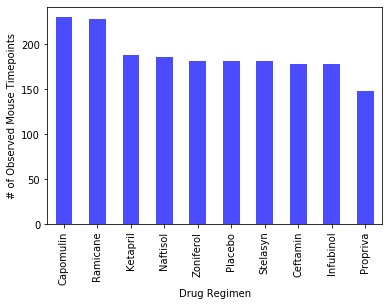

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen = clean_mice.groupby("Drug Regimen").size()
regimen = regimen.sort_values(ascending=False)
regimen_bar_chart = regimen.plot(kind="bar", color="blue", alpha=0.7)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

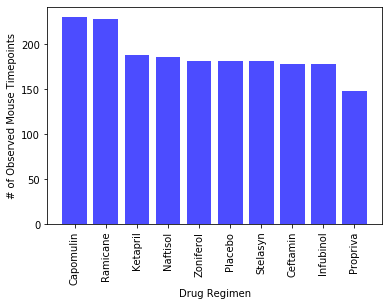

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x = regimen.index
y = regimen.values

plt.bar(x, y, color="blue", alpha=0.7)

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=90)

plt.show()


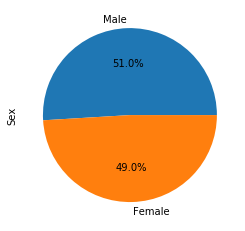

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pie = clean_mice["Sex"].value_counts()
pie.plot.pie(autopct="%1.1f%%")
plt.show()

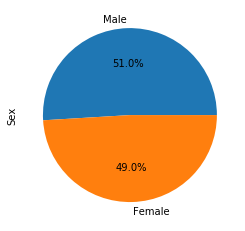

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_pie = plt.pie(pie, labels=pie.index, autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_data = clean_mice[clean_mice['Drug Regimen'].isin(treatment_regimens)]
# Start by getting the last (greatest) timepoint for each mouse
last_timepoints = filtered_data.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_df = clean_mice.merge(last_timepoints, on=['Mouse ID', 'Timepoint'])

In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for regimen in treatment_regimens: 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volume = tumor_df.loc[tumor_df['Drug Regimen']== regimen, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_data.append(tumor_volume)
    
    # Determine outliers using upper and lower bounds
    lower_bound = tumor_volume.quantile(0.25) - 1.5 * (tumor_volume.quantile(0.75) - tumor_volume.quantile(0.25))
    upper_bound = tumor_volume.quantile(0.75) + 1.5 * (tumor_volume.quantile(0.75) - tumor_volume.quantile(0.25))
    outliers = tumor_volume[(tumor_volume < lower_bound) | (tumor_volume > upper_bound)]
    
    print(f"{regimen}'s potential outliers:")
    print(outliers)
    print()

Capomulin's potential outliers:
Series([], Name: Tumor Volume (mm3), dtype: float64)

Ramicane's potential outliers:
Series([], Name: Tumor Volume (mm3), dtype: float64)

Infubinol's potential outliers:
1    36.321346
Name: Tumor Volume (mm3), dtype: float64

Ceftamin's potential outliers:
Series([], Name: Tumor Volume (mm3), dtype: float64)



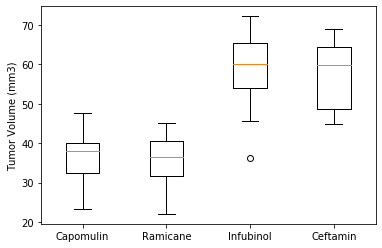

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
Capomulin_tumors = tumor_df.loc[tumor_df['Drug Regimen'] == 'Capomulin', 'Tumor Volume (mm3)']
Ramicane_tumors = tumor_df.loc[tumor_df['Drug Regimen'] == 'Ramicane', 'Tumor Volume (mm3)']
Infubinol_tumors = tumor_df.loc[tumor_df['Drug Regimen'] == 'Infubinol', 'Tumor Volume (mm3)']
Ceftamin_tumors = tumor_df.loc[tumor_df['Drug Regimen'] == 'Ceftamin', 'Tumor Volume (mm3)']
data_to_plot = [Capomulin_tumors, Ramicane_tumors, Infubinol_tumors, Ceftamin_tumors]
Regimen = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
figl, axl = plt.subplots()
axl.set_ylabel('Tumor Volume (mm3)')
axl.boxplot(data_to_plot, labels = Regimen, widths = 0.4, vert = True)
plt.show()



## Line and Scatter Plots

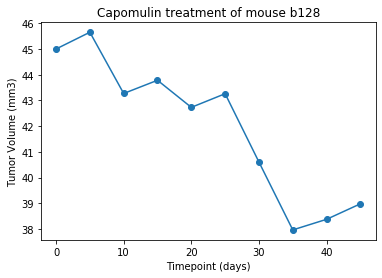

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
Capomulin_df = combined_data.loc[combined_data["Drug Regimen"] == "Capomulin", :]
line_df = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "b128", :]

plt.plot(line_df['Timepoint'], line_df['Tumor Volume (mm3)'], marker='o', linestyle='-')
plt.title(f"Capomulin treatment of mouse b128")
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

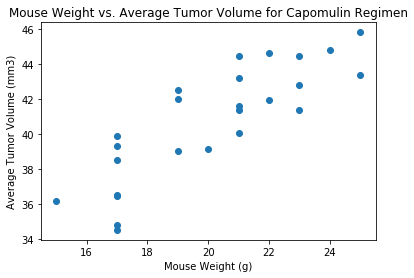

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
Capomulin_df = combined_data.loc[combined_data["Drug Regimen"] == "Capomulin"]

average_tumor_volume = Capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

mouse_weights = Capomulin_df.groupby('Mouse ID')['Weight (g)'].unique()

mouse_weights = mouse_weights.apply(lambda x: x[0])
plt.scatter(mouse_weights, average_tumor_volume)

plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()

## Correlation and Regression

Correlation Coefficient: 0.84
Linear Regression Equation: Average Tumor Volume = 21.55 + 0.95 * Mouse Weight


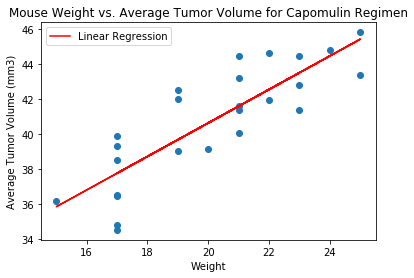

In [26]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
import statsmodels.api as sm

capomulin_df = combined_data.loc[combined_data["Drug Regimen"] == "Capomulin"]
average_tumor_volume = capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weights = capomulin_df.groupby('Mouse ID')['Weight (g)'].mean()
correlation_coefficient, _ = st.pearsonr(mouse_weights, average_tumor_volume)

X = sm.add_constant(mouse_weights)
model = sm.OLS(average_tumor_volume, X).fit()
slope = model.params[1]
intercept = model.params[0]

plt.scatter(mouse_weights, average_tumor_volume)
plt.plot(mouse_weights, intercept + slope * mouse_weights, color='red', label='Linear Regression')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight')
plt.ylabel('Average Tumor Volume (mm3)')
plt.legend()

print(f"Correlation Coefficient: {correlation_coefficient:.2f}")
print(f"Linear Regression Equation: Average Tumor Volume = {intercept:.2f} + {slope:.2f} * Mouse Weight")

plt.show()